# Question 3

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def normalize(im):
    res = im.astype('int16')
    numerator = res - np.min(res)
    denominator = max(1,np.max(res) - np.min(res))
    return np.uint8(np.round( 255*(numerator)/(denominator)))

In [3]:
def BitQuantizeImage(im, k):
    return np.uint8(np.round((np.right_shift(im.astype('int64'), 8 - k)*255)/(np.left_shift(1, k) - 1)))    
#     return np.left_shift(np.right_shift(im, 8 - k), 8 - k)

In [4]:
def showQuantized(im):
    _, bitPlanes = plt.subplots(4,2,figsize = (15,20))
    for i in range(8):
        bitPlanes[i//2][i%2].imshow(BitQuantizeImage(img, i+1), cmap = 'gray', vmin = 0, vmax = 255)
        bitPlanes[i//2][i%2].set_title("Bit Quantize " + str(i+1))
    plt.show()   

In [5]:
def BitPlane(im, k):
    return im & np.left_shift(np.uint8(1), k)

In [6]:
def showBitPlanes(im):
    _, bitPlanes = plt.subplots(4,2,figsize = (15,20))
    for i in range(8):
        out = normalize(BitPlane(img, 1))
        bitPlanes[i//2][i%2].imshow(normalize(BitPlane(img, i)), cmap = 'gray', vmin = 0, vmax = 255)
        bitPlanes[i//2][i%2].set_title("Bit Plane " + str(i))
    plt.show()
        

# part 1 

In [7]:
img = cv.imread('./images/quantize.jpg')

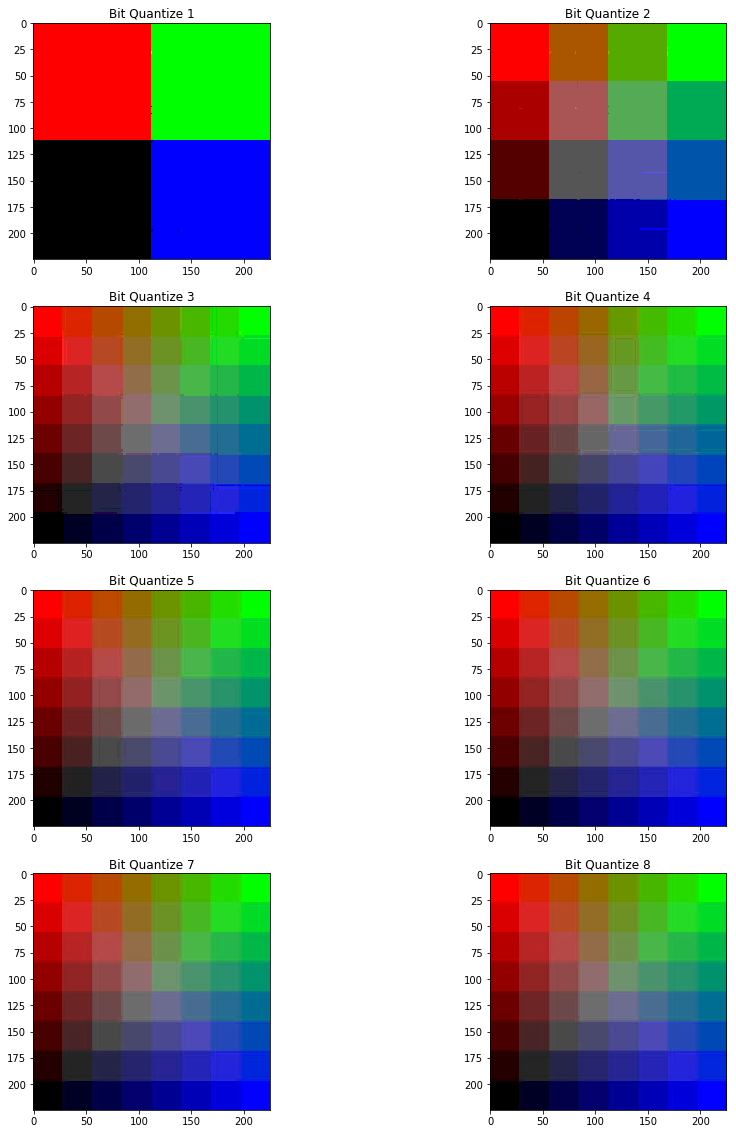

In [8]:
showQuantized(img)

# part 2

In [9]:
img = cv.imread('./images/cameraman.png')

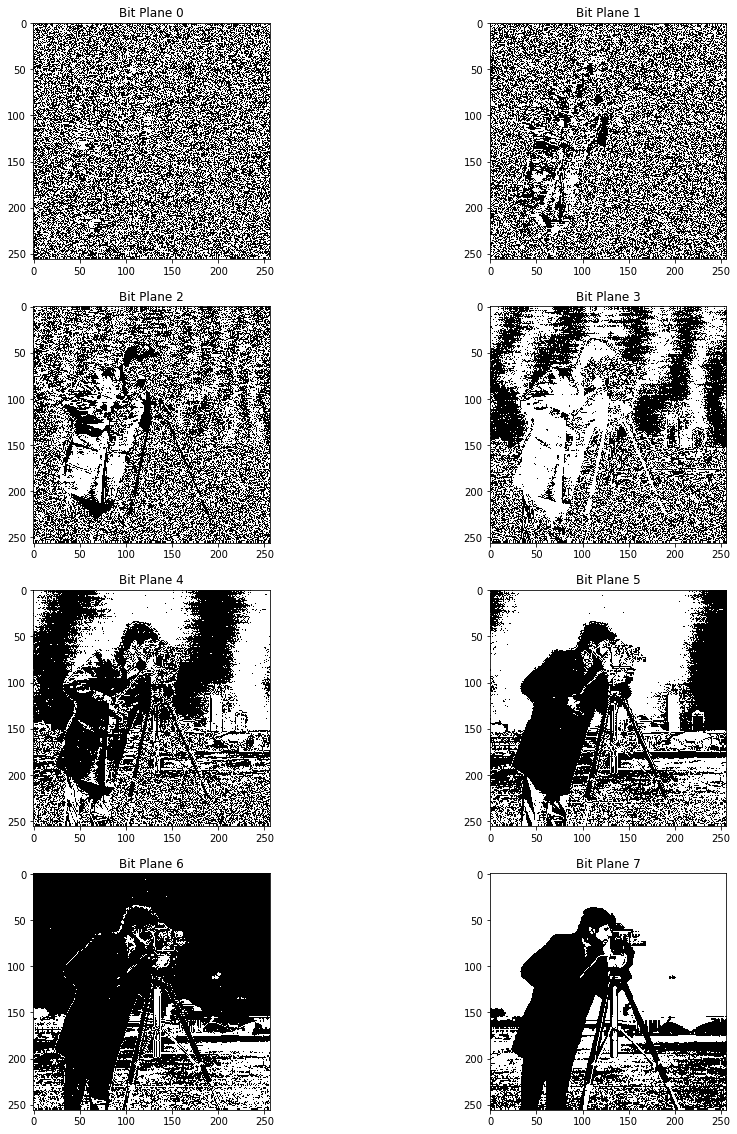

In [10]:
showBitPlanes(img)

# part 3

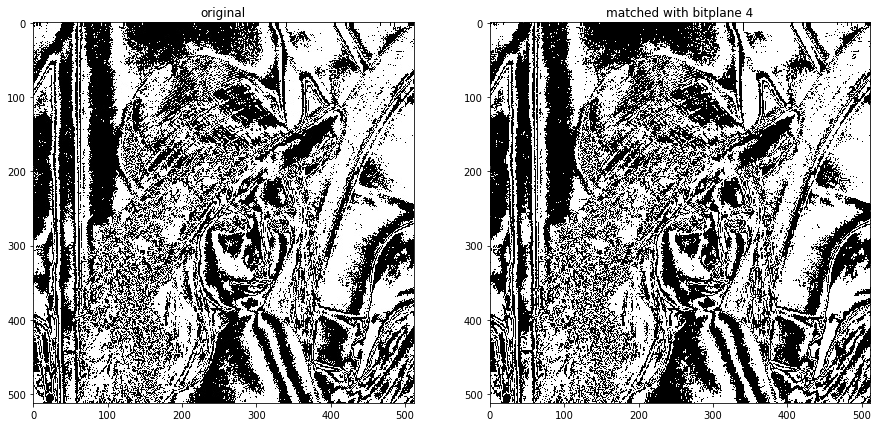

In [11]:
im = cv.imread('./images/lena.jpg', cv.IMREAD_GRAYSCALE)
qim = cv.imread('./images/lena1.jpg', cv.IMREAD_GRAYSCALE)
       
_,plots = plt.subplots(1,2, figsize = (15,15))

plots[0].imshow(qim, cmap = 'gray', vmin = 0, vmax = 255)
plots[0].set_title("original")
plots[1].imshow(normalize(BitPlane(im,4)), cmap = 'gray', vmin = 0, vmax = 255)
plots[1].set_title("matched with bitplane 4")

plt.show()

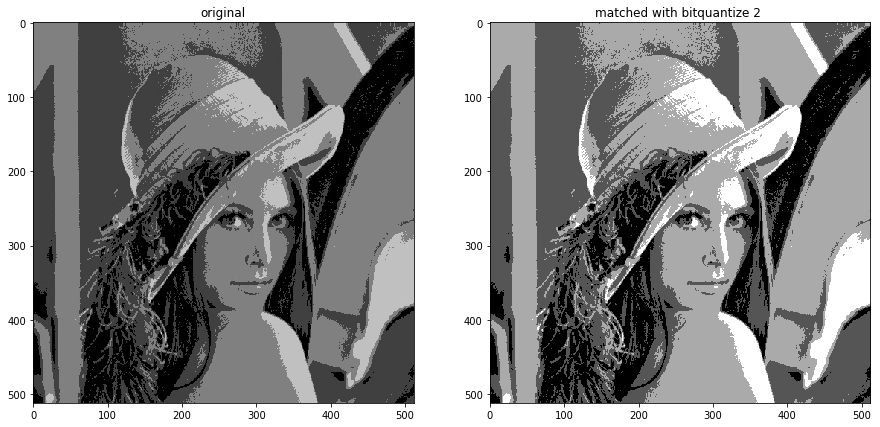

In [12]:
im = cv.imread('./images/lena.jpg', cv.IMREAD_GRAYSCALE)
qim = cv.imread('./images/lena2.jpg', cv.IMREAD_GRAYSCALE)

_,plots = plt.subplots(1,2, figsize = (15,15))

plots[0].imshow(qim, cmap = 'gray', vmin = 0, vmax = 255)
plots[0].set_title("original")
plots[1].imshow(BitQuantizeImage(im,2), cmap = 'gray', vmin = 0, vmax = 255)
plots[1].set_title("matched with bitquantize 2 ")

plt.show()

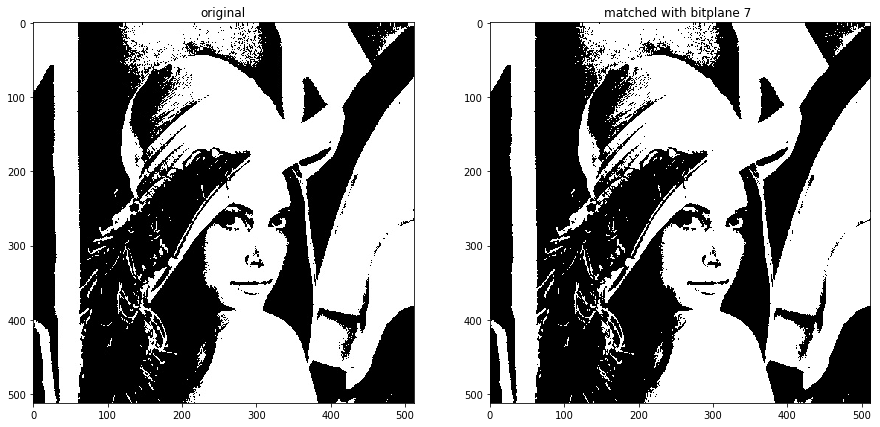

In [13]:
im = cv.imread('./images/lena.jpg', cv.IMREAD_GRAYSCALE)
qim = cv.imread('./images/lena3.jpg', cv.IMREAD_GRAYSCALE)

_,plots = plt.subplots(1,2, figsize = (15,15))

plots[0].imshow(qim, cmap = 'gray', vmin = 0, vmax = 255)
plots[0].set_title("original")
plots[1].imshow(normalize(BitPlane(im,7)), cmap = 'gray', vmin = 0, vmax = 255)
plots[1].set_title("matched with bitplane 7 ")

plt.show()